$\textbf {Немного математики}$

Напишем разложение в ряд для экспоненты $e^{x}$ вблизи нуля. Ограничимся первыми $N$ членами ряда:
\begin{equation}
e^{x} \approx \sum_{n=0}^{N}\frac{x^n}{n!}
\end{equation}

Это так называемая частичная сумма ряда Тейлора. Для произвольной и бесконечно дифференцируемой в точке $a$ функции $f(x)$:
\begin{equation}
f(x) = f(a) + \sum_{n=1}^{\infty}\frac{(x-a)^n}{n!}\frac{d^nf(a)}{dx^n}
\end{equation}

Посчитаем, к примеру, $e^{-0,82}$, используя нашу формули при $N=10$:

In [49]:
import math
ITERATIONS = 10
def nol(x):
    return x*0

def keksp(x):
    """
    Вычисление экспоненты при помощи частичного суммирования
    ряда Тейлора для окрестности 0
    """
    x_pow = 1
    multiplier = 1
    partial_sum = 1
    for n in range(1, ITERATIONS):
        x_pow *= x # В цикле постепенно считаем степень
        multiplier *= 1 / n  # (-1)^n и факториал
        partial_sum += x_pow * multiplier
    
    return partial_sum
print(help(keksp), keksp(-0.82))


print(help(math.exp), math.exp(-0.82))

Help on function keksp in module __main__:

keksp(x)
    Вычисление экспоненты при помощи частичного суммирования
    ряда Тейлора для окрестности 0

None 0.4404316192711155
Help on built-in function exp in module math:

exp(x, /)
    Return e raised to the power of x.

None 0.4404316545059993


Точность просто великолепна. Расхождение начинается только с восьмого знака! Посмотрим, как долго она сохраняется.

<function my_sin at 0x7f966851cef0> <numpy.vectorize object at 0x7f9651891d50>


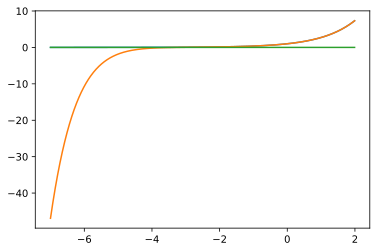

In [56]:
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')


import matplotlib.pyplot as plt
import numpy as np

vs = np.vectorize(keksp)
print(my_sin, vs)

x = np.r_[-7:2:0.01]
plt.plot(x, np.exp(x))
plt.plot(x, vs(x))
plt.plot(x,nol(x))
plt.show()

Справа настоящая экспонента неотличима от нашей, а слева  - от нуля, поэтому ее не видно. Приближенная экспонента начинает расходиться при отрицательных аргументах.

Попробуем вызвать нашу функцию от комплексного аргумента. Попробуем запустить знаменитую формулу Эйлера $e^{i\pi}+1=0$:

In [72]:
import math
import cmath
ITERATIONS = 100
def nol(x):
    return x*0

def keksp(x):
    """
    
    """
    x_pow = 1
    multiplier = 1
    partial_sum = 1
    for n in range(1, ITERATIONS):
        x_pow *= x # В цикле постепенно считаем степень
        multiplier *= 1 / n  # (-1)^n и факториал
        partial_sum += x_pow * multiplier
    
    return partial_sum
x = cmath.sqrt(-1)*math.pi
print("exp(iп) +1 = ", keksp(x)+1)


print("math.exp(iп)+1 = ", cmath.exp(x)+1)

exp(iп) +1 =  (-6.661338147750939e-16-1.2506253891452996e-17j)
math.exp(iп)+1 =  1.2246467991473532e-16j


Отклонение очень мало, хоть и присутствует.